# Изучение закономерностей, определяющих успешность игр

## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данные представленны до 2016 года. Планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. 

### Исходные данные:

Исходные данные хранятся в csv файле: **/datasets/games.csv**

### Описание данных: 

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

*Примечание: Данные за 2016 год могут быть неполными.*

### План работы:

#### Шаг 1. Откроем файл с данными и изучим общую информацию
1. Путь к файлу: /datasets/games.csv.

#### Шаг 2. Подготовим данные
1. Заменим названия столбцов (приведем к нижнему регистру);
2. Преобразуем данные в нужные типы. Опишим, в каких столбцах заменили тип данных и почему;
3. Обработаем пропуски при необходимости:
4. Объясним, почему заполнили пропуски определённым образом или почему не стали это делать;
5. Опишим причины, которые могли привести к пропускам;
6. Отдельно разберем значение 'tbd' в столбцах с рейтингом и опишим, как его обработать;
7. Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

#### Шаг 3. Проведем исследовательский анализ данных
1. Посмотрим, сколько игр выпускалось в разные годы.Ответим на вопрос: Важны ли данные за все периоды?
2. Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и постройте распределение по годам. Ответим на вопрос: За какой характерный срок появляются новые и исчезают старые платформы?
3. Определим актуальный период. Основной фактор — эти данные помогут построить прогноз на 2017 год.
4. Для актуального периода определим:
     - Какие платформы лидируют по продажам, растут или падают? Выберим несколько потенциально прибыльных платформ.
     - Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
     - Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
     - Соотнесем выводы с продажами игр на других платформах.
     - Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
     
#### Шаг 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
 - Самые популярные платформы (топ-5). 
 - Самые популярные жанры (топ-5). 
 - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
 
#### Шаг 5. Проверим гипотезы
Сформулируем и проверим гипотезы:
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action и Sports разные.
Поясним:
 - Как вы сформулировали нулевую и альтернативную гипотезы;
 - Какой критерий применили для проверки гипотез и почему.
 
#### Шаг 6. Напишим общий вывод

### Шаг 1. Откроем файл с данными и изучим общую информацию


In [1]:
import pandas as pd # импортируем библиотеку pandas
import numpy as np # импортируем библиотеку numpy
import matplotlib.pyplot as plt # импортируем модуль pyplot из matplotlib
from scipy import stats as st # импортируем библиотеку scipy

In [2]:
df = pd.read_csv('/datasets/games.csv') # прочитаем файл csv и сохраним данные в таблицу df.

In [3]:
df.head(10) # напечатаем первые 10 строк таблицы df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.tail(10) # напечатаем последние 10 строк таблицы df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
df.info(10) # вызовем метод info() для получения данных о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.duplicated().sum() # подсчитаем количества дубликатов в df, вызовем метод duplicated() и sum()

0

### Выводы_шаг1:

Открыли файл с данными и изучили общую информацию о данных.

## Шаг 2. Подготовка данных

### 1. Приведем к нижнему регистру названия cтолбцов

In [7]:
# Заменим названия столбцов, приведем к нижнему регистру
df.columns = df.columns.str.lower()

### 2. Перед предобработкой данных подробно посмотрим, какие данные хранятся в таблице:

In [8]:
df.isnull().sum() # проверим данные на наличие пропусков вызовом методов isnull() и sum() для суммирования пропущенных значений

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
df.name.value_counts() # уникальные значения и количество 'name'

Need for Speed: Most Wanted                       12
Ratatouille                                        9
FIFA 14                                            9
Madden NFL 07                                      9
LEGO Marvel Super Heroes                           9
                                                  ..
WWE Day of Reckoning 2                             1
Super Smash Bros. Melee                            1
Sakura Taisen 2 - Kimi, Shinitamou Koto Nakare     1
Harvest Moon DS (jp sales)                         1
Zendoku                                            1
Name: name, Length: 11559, dtype: int64

In [10]:
df.platform.unique() # получим список со всеми уникальными значениями 'platform'

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [11]:
df.platform.value_counts() # уникальные значения и количество 'platform'

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

In [12]:
df.year_of_release.unique() # получим список со всеми уникальными значениями 'year_of_release'

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
df.year_of_release.value_counts() # уникальные значения и количество 'year_of_release'

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [14]:
df.genre.unique() # получим список со всеми уникальными значениями 'genre'

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [15]:
df.genre.value_counts() # уникальные значения и количество 'genre'

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [16]:
df.critic_score.unique()  # получим список со всеми уникальными значениями 'critic_score'

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [17]:
df.critic_score.value_counts() # уникальные значения и количество 'critic_score'

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
17.0      1
22.0      1
13.0      1
21.0      1
Name: critic_score, Length: 82, dtype: int64

In [18]:
df.user_score.unique() # получим список со всеми уникальными значениями 'user_score'

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [19]:
df.user_score.value_counts() # уникальные значения и количество 'user_score'

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
0.3       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [20]:
df.rating.unique() # получим список со всеми уникальными значениями 'rating'

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [21]:
df.rating.value_counts() # уникальные значения и количество 'rating'

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

### 3. Обработка пропусков

#### 3.1. Пропуски в названии игры:

В столбце с названием игр есть 2 строчки с пропусками (0,011% всех данных). Узнать какая это игра нет возможности, поэтому заменим пропуски на значение "unknown".

In [22]:
# Распечатаем строки таблицы с пропущенными значениями в столбце 'name'
df.loc[df.name.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [23]:
#заменим пропуски в столбце на значение "unknown":
df.name = df.name.fillna('"unknown"') # заменим пропуски методом fillna()

In [24]:
df.name.isnull().sum() #проверим отсутствие пропусков

0

#### 3.2. Пропуски в жанре:

В столбце 'genre' есть 2 строчки с пропусками, в тех же строках, где пропущены названия игр. Мы не знаем, что это за игра и какой у нее жанр, поэтому заменим пропуски на значение "unknown".

In [25]:
# Распечатаем строки таблицы с пропущенными значениями в столбце 'genre'
df.loc[df.genre.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,"""unknown""",GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,"""unknown""",GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [26]:
#заменим пропуски в столбце на значение "unknown":
df.genre = df.genre.fillna('"unknown"') # заменим пропуски методом fillna()

In [27]:
df.genre.isnull().sum() #проверим отсутствие пропусков

0

#### 3.3. Пропуски в отзывах критиков, отзывах пользователей и рейтинге:

In [28]:
# Распечатаем строки таблицы с пропущенными значениями в столбце 'critic_score'
df.loc[df.critic_score.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [29]:
'Доля пропущенных значений в critic_score {:.1%}'.format(df.critic_score.isnull().sum() / df.shape[0])

'Доля пропущенных значений в critic_score 51.3%'

In [30]:
# Распечатаем строки таблицы с пропущенными значениями в столбце 'user_score'
df.loc[df.user_score.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [31]:
'Доля пропущенных значений в user_score {:.1%}'.format(df.user_score.isnull().sum() / df.shape[0])

'Доля пропущенных значений в user_score 40.1%'

В столбце 'critic_score' 8578 пропусков (51,3% от данных), в столбце 'user_score' - 6707 пропуск (40,1% от данных).

Возможная причина: на эти игры критики и пользователи не оставили отзывы. 

В столбце 'user_score' содержится аббревиатура 'tbd'- to be determined - будет определено. В настоящий момент эти данные отсутствуют.

Пропуски в 'critic_score' и 'user_score' и значение 'tbd' заменим на нули.

In [32]:
# Заменим пропуски заменим на нули
df.critic_score = df.critic_score.fillna(0)

In [33]:
#Заменим 'tbd' на None, приведем к типу данных 'float64'
df.user_score = df.user_score.replace('tbd', None).astype('float64')

In [34]:
# Заменим пропуски заменим на нули
df.user_score = df.user_score.fillna(0)

Пропуски в столбце 'rating' заменим на "NO", т.к. тип данных столбца 'object' и нельзя рассчитать среднее или медиану

In [35]:
'Доля пропущенных значений в rating {:.1%}'.format(df.rating.isnull().sum() / df.shape[0])

'Доля пропущенных значений в rating 40.5%'

In [36]:
# Заменим пропуски на "NO"
df.rating = df.rating.fillna("NO")

#### 3.4. Пропуски в годе выпуска игры:


In [37]:
# Распечатаем строки таблицы с пропущенными значениями в столбце 'year_of_release'
df.loc[df.year_of_release.isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,0.0,0.0,NO
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,0.0,0.0,NO
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,0.0,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,0.0,0.0,NO


In [38]:
'Доля пропущенных значений в year_of_release {:.2%}'.format(df.year_of_release.isnull().sum() / df.shape[0])

'Доля пропущенных значений в year_of_release 1.61%'

В столбце 'year_of_release' есть 269 строчек с пропусками (1.61% всех данных). 
Одни и те же игры есть на разных платформах. Поэтому часть пропусков можно заменить на максимальное значение года для одних и тех же игры на разных платформах. Строки с пропусками для которых не нашлось замены удалим из таблицы.

In [39]:
# Найдем максимальное значение года выпуска по названию игр и сохраним в name_year_of_release_max
name_year_of_release_max = df.groupby('name')['year_of_release'].max().sort_values(ascending=False)
name_year_of_release_max

name
 Beyblade Burst                               2016.0
Eve: Burst Error R                            2016.0
Duke Nukem 3D: 20th Anniversary World Tour    2016.0
Dungeons 2                                    2016.0
Anima - Gate of Memories                      2016.0
                                               ...  
Yu Yu Hakusho: Dark Tournament                   NaN
Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)       NaN
Zero: Tsukihami no Kamen                         NaN
eJay Clubworld                                   NaN
wwe Smackdown vs. Raw 2006                       NaN
Name: year_of_release, Length: 11560, dtype: float64

In [40]:
# Функция для замены пропусков в 'year_of_release'
def replace_year_of_release_to_max(row):
    if np.isnan(row['year_of_release']):
        return name_year_of_release_max[row['name']]
    return row['year_of_release']
 
df['year_of_release'] = df.apply(replace_year_of_release_to_max, axis=1)

In [41]:
'Доля пропущенных значений в year_of_release после замены пропусков {:.2%}'.format(df.year_of_release.isnull().sum() / df.shape[0])

'Доля пропущенных значений в year_of_release после замены пропусков 0.87%'

In [42]:
# Удалим строки с пропусками в столбце year_of_release
df.dropna(subset=['year_of_release'], inplace=True)

In [43]:
# Сбросим индексы
df = df.reset_index(drop=True)

### 4. Преобразуем тип данных:

* Значения 'year_of_release' целые числа, преобразуем данные в целочисленный тип.
* Значения продаж 'na_sales','jp_sales','other_sales' - тоже целые числа, но поскольку выражены в млн, тип данных оставим float64.
* Значения 'critic_score' - оценка критиков не обязательно является целым числом, тип данных оставим без измененния float64.
* Столбец 'user_score' - оценка пользователей не обязательно является целым числом, тип данных преобразуем в float64

In [44]:
#Преобразуем данные в столбце 'year_of_release' в целочисленный тип:

df.year_of_release = df.year_of_release.astype('int64')

In [45]:
#Преобразуем данные в столбце 'user_score' в тип 'float64':

df.user_score = df.user_score.astype('float64')

### 5. Посчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [46]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

### Выводы_шаг2:

Выполнена предобработка данных:

1) Названия столбцов таблицы df приведены к нижнему регистру.

2) В данных имеются следующие пропуски:

* В столбце с названием игр 'name' и в столбце 'genre' (в тех же строках) есть 2 строчки с пропусками (0,011% всех данных). Возможная причина появления пропуской: в данныхэти поля были пропущены. Узнать какая это игра и какой у игры жанр нет возможности, поэтому заменим пропуски на значение "unknown".

* В столбце 'critic_score' 8578 пропусков (51,3% от данных), в столбце 'user_score' - 6707 пропуск (40,1% от данных).Возможная причина: на эти игры критики и пользователи не оставили отзывы. В столбце 'user_score' содержится аббревиатура 'tbd'- to be determined - будет определено. В настоящий момент эти данные отсутствуют. Пропуски в 'critic_score' и 'user_score', а также значение 'tbd' заменим на нули.

* Пропуски в столбце 'rating' заменим на NO, т.к. тип данных столбца 'object' и нельзя рассчитать среднее или медиану. Возможная причина: ассоциация ESRB, определяющая возрастной рейтинг компьютерных игр, не оценила эти игры.

* В столбце 'year_of_release' есть 269 строчек с пропусками (1.61% всех данных). Возможная причина: данные не были указаны.  Часть пропусков в year_of_release заменим на максимальное значение года для одних и тех же игры на разных платформах. Строки с пропусками для которых не нашлось замены удалим из таблицы (0,87%). 

3) Тип данных заменен у следующих столбцов:
* Значения 'year_of_release' - тип данных 'int64'.
* Столбец 'user_score' - тип данных 'float64'.

4) Посчитано общее кол-во продаж во всех регионах. Суммарное значение записано в отдельный столбец 'total_sales'.

## Шаг 3. Исследовательский анализ данных

### 1. Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [47]:
# Cколько игр выпускалось в разные годы
df.year_of_release.value_counts()

2008    1440
2009    1431
2010    1271
2007    1202
2011    1153
2006    1020
2005     947
2002     845
2003     785
2004     765
2012     662
2015     606
2014     582
2013     547
2016     502
2001     484
1998     379
2000     350
1999     339
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

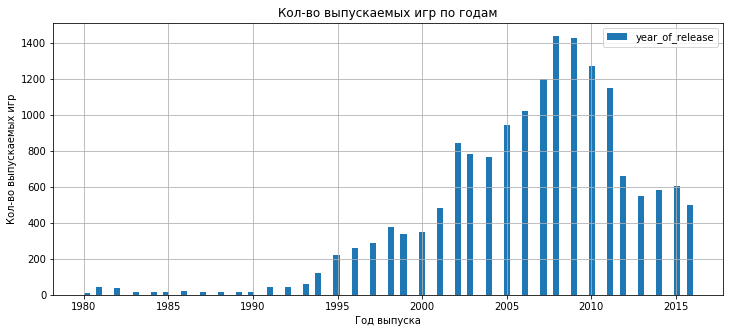

In [48]:
# Гистограмма: сколько игр выпускалось в разные годы
df.year_of_release.hist(bins=100, figsize=(12, 5)); 
plt.legend(['year_of_release']);
plt.title('Кол-во выпускаемых игр по годам');
plt.xlabel('Год выпуска');
plt.ylabel('Кол-во выпускаемых игр');

**Вывод:** Больше всего игр выпускалось в 2008 и 2009 годах. До 1995 года кол-во выпускаемых игр был очень низким, с 1995 по 2009 был рост в количестве выпускаемых игр, после 2009 г. выпуск игр пошел на спад и с 2012-2016 года количество выпускаемых игр примерно на одном уровне.

Данные за все периоды не важны. Оставим данные начиная с 1995 года.

In [49]:
df = df.query('year_of_release >= 1995')
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NO,31.38
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16564,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NO,0.01
16565,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,NO,0.01
16566,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NO,0.01
16567,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,NO,0.01


### 2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [50]:
# суммарные продажи по платформам
df_platform_sales = (
    df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by = 'total_sales', ascending = False))
df_platform_sales

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.26
PS,721.55
PS4,314.14
GBA,313.73
PSP,293.57


In [51]:
# Выберем топ-10 платформ с наибольшими суммарными продажами

games_platform_top10 = df_platform_sales.head(10).index
games_platform_top10

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [52]:
games_top10_sales = (df
                     .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                    )
games_top10_sales

total_sales
platform year_of_release             
2600     2002                    2.53
3DO      1995                    0.08
3DS      2010                    0.32
         2011                   63.20
         2012                   51.76
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[191 rows x 1 columns]

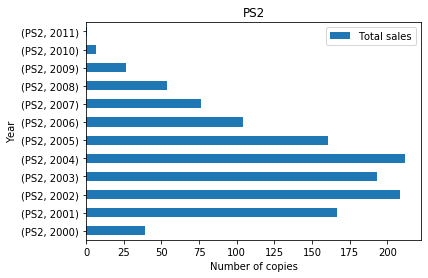

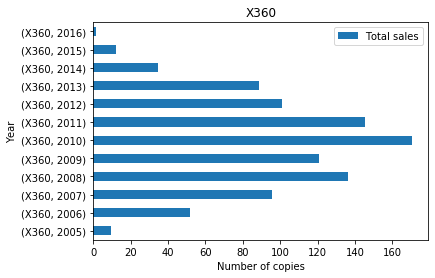

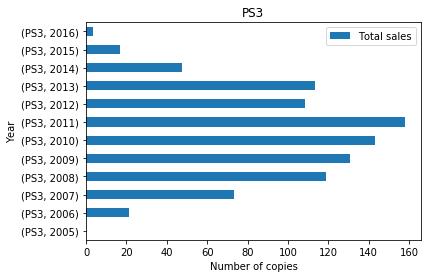

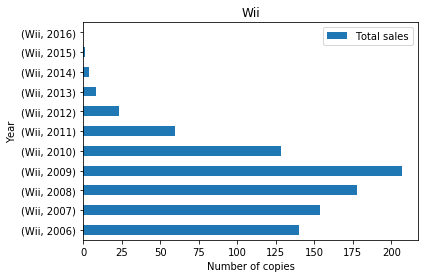

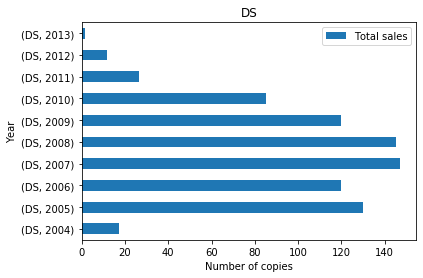

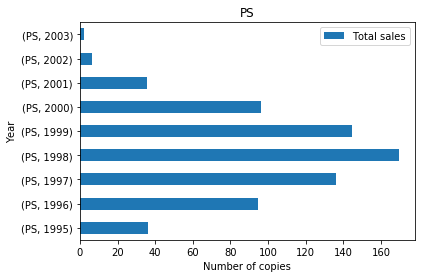

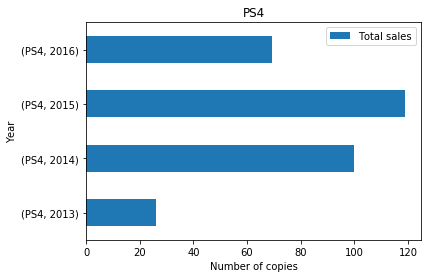

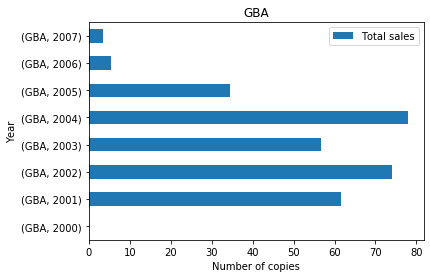

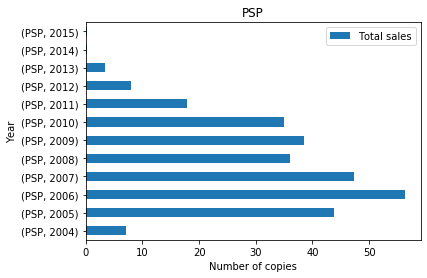

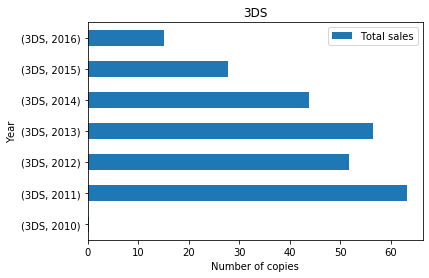

In [53]:
# Построим графики зависимости продаж от года для топ-10 платформ
for name in games_platform_top10:
    games_top10_sales.query('platform == @name').plot(y='total_sales', kind='barh')
    plt.xlabel('Number of copies')
    plt.ylabel('Year')
    plt.title(name)
    plt.legend(['Total sales'])
    plt.show

### 3. Определим актуальные период (Основной фактор — эти данные помогут построить прогноз на 2017 год.)

Актуальный период выберем на основе тех платформ, которые на последний год в датасете находятся в пике. Те платформы, которые уже "умерли", смотреть для прогноза продаж на 2017 год нет смысла. В качестве актуального периода для построения прогноза на 2017 год выберем период 2013-2016 гг.

In [54]:
# Сделаем срез данных для актуального периода
df_good_years = df.query('year_of_release >= 2013 & year_of_release <= 2016')
df_good_years

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NO,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,NO,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16557,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NO,0.01
16561,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,NO,0.01
16564,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,NO,0.01
16566,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,NO,0.01


### 4. Определим какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [55]:
# Посчитаем продажи игр по платформам в актуальном периоде
platform_sales = (
    df_good_years
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by = 'total_sales', ascending = False))
platform_sales

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,40.06
PSV,32.99
Wii,13.66


In [56]:
# продажи по платформам за 2013 -2016 гг.
df_good_years.pivot_table(index='year_of_release', columns='platform', values ='total_sales', aggfunc='sum').fillna(0)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,56.57,1.54,12.66,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.63,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


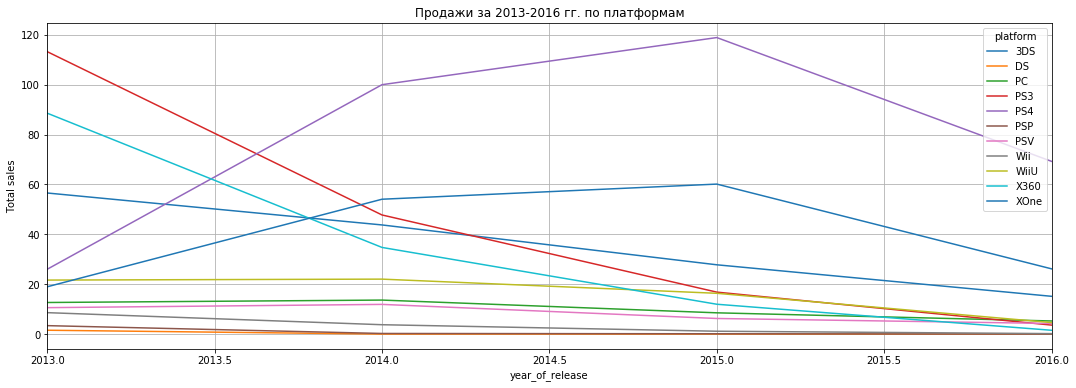

In [57]:
# Построим графики изменения продаж по годам для каждой из платформ:
games_platform_year = (
    df_good_years
    .pivot_table(index='year_of_release', columns='platform', values ='total_sales', aggfunc='sum').fillna(0)
    .plot(grid=True, figsize=(18, 6))) 
plt.title('Продажи за 2013-2016 гг. по платформам');
plt.ylabel('Total sales');
plt.show;

**Вывод:** Наиболее прибыльными платформами являются  - PS4 и XOne. За 2013 - 2015 гг. у данных платформ был рост продаж, в 2016 году рост снизился, но выше, чем у остальных платформ. Также потенциально прибильной может быть платорма 3DS.

### 5. Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

Построим график «ящик с усами» для выбранных перспективных платформ: PS4, XOne и 3DS

In [58]:
# Сохраним перечень платформ в список
games_platform_actual = ['PS4', 'XOne', '3DS']

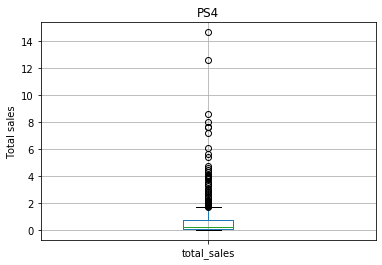

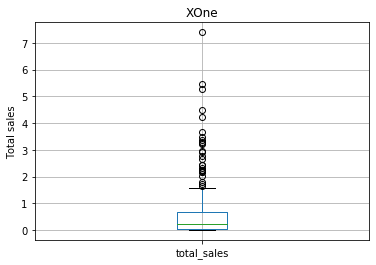

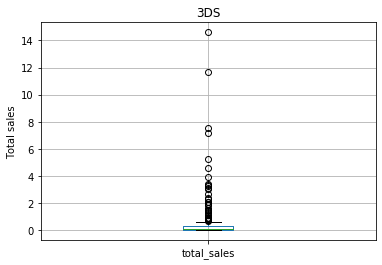

In [59]:
# Диаграммы размаза по количеству глобальных продаж для каждой из платформ:
for name in games_platform_actual:
    df_good_years.query('platform in @name').boxplot(column='total_sales', figsize=(6,4));
    plt.title(name)
    plt.ylabel('Total sales');
    plt.show();

In [60]:
# Посчитаем суммарные и средние продажи по перспективным платформам, а также посчитаем медиану
(df_good_years
 .query('platform in @games_platform_actual')
 .pivot_table(index='platform',  values ='total_sales', aggfunc=['sum', 'mean','median'])   
)

,sum,mean,median
,total_sales,total_sales,total_sales
platform,,,
3DS,143.25,0.472772,0.09
PS4,314.14,0.801378,0.20
XOne,159.32,0.645020,0.22


**Вывод:** 
Построили диаграммы размаха для перспективных платформ: PS4, XOne и 3DS. Полученные диаграммы размаха иллюстрируют скошенность данных вправо (среднее больше медианы). 

Суммарные продажи больше всех у PS4 и более чем в 2 раза больше чем у XOne и 3DS, а суммарные продажи XOne и 3DS близки по значениям.

Значение средних продаж больше всего у платформы PS4 и меньше всего у платформы 3DS (на 40% меньше, чем у PS4). 

### 6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Выберем платформу с максимальными продажами - "PS4".

In [61]:
# Срез данных по платформе PS4 и по отзывам критиков:
games_critic_score = df_good_years.query('platform == "PS4" & critic_score > 0')

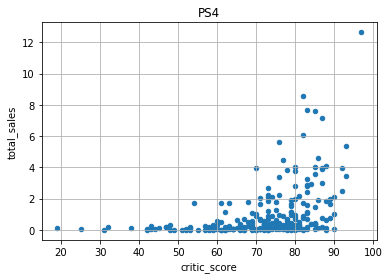

In [62]:
# построим диаграмму рассеяния 
games_critic_score.plot(x='critic_score', y='total_sales', kind='scatter', grid=True);
plt.title('PS4')
plt.show();

In [63]:
# Посчитаем коэф. корреляции
'Коэффициент корреляции равен {:.2f}'.format(games_critic_score['critic_score'].corr(games_critic_score['total_sales']))

'Коэффициент корреляции равен 0.41'

In [64]:
# Срез данных по платформе PS4 и по отзывам пользователей:
games_user_score = df_good_years.query('platform == "PS4" & user_score > 0')

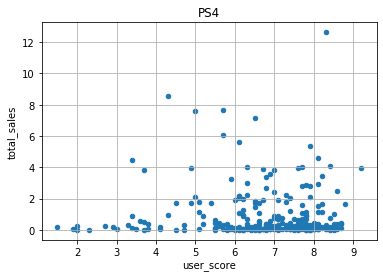

In [65]:
# построим диаграмму рассеяния 
games_user_score.plot(x='user_score', y='total_sales', kind='scatter', grid=True);
plt.title('PS4')
plt.show();

In [66]:
# Посчитаем коэф. корреляции
'Коэффициент корреляции равен {:.2f}'.format(games_user_score['user_score'].corr(games_user_score['total_sales']))

'Коэффициент корреляции равен -0.03'

**Выводы:** 

Коэффициент корреляции для оценки критиков равен 0.41, что говорит наличии слабой зависимости продаж от оценок критиков.

Коэффициент корреляции для оценок пользователей близок к нулю и равен -0.03, что говорит об отсутствии зависимости продаж от оценок пользователей.

### 7.Соотнесём выводы с продажами игр на других платформах.

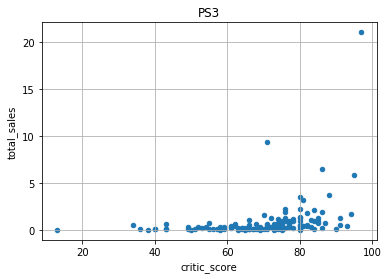

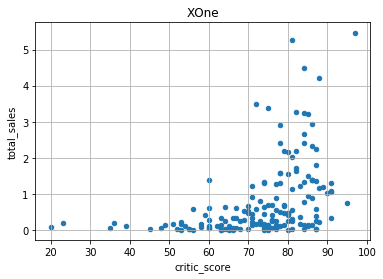

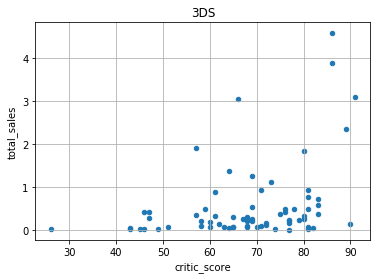

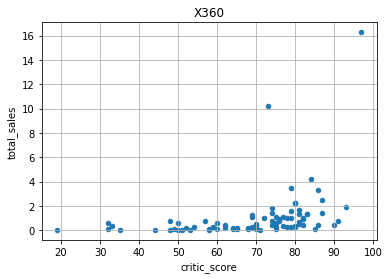

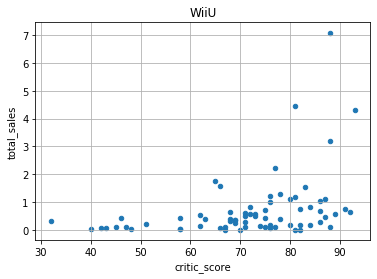

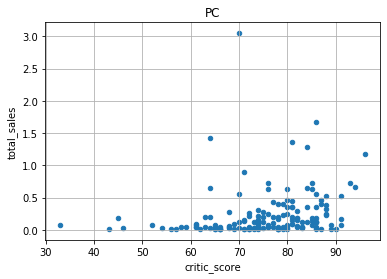

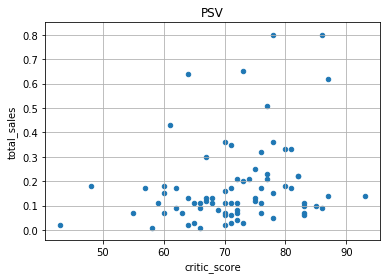

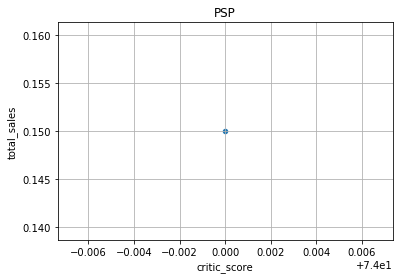

In [67]:
# Построим диаграммы рассеиния по отзывам критиков для остальных платформ
top_platform = ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']
for name in top_platform:
    try:
        (df_good_years
         .query('platform == @name & critic_score > 0').plot(x='critic_score', y='total_sales', kind='scatter', grid=True));
        plt.title(name)
        plt.show();
    except: pass  

In [68]:
# Рассчитаем коэффициент корреляции по отзывам критиков для остальных платформ:

top_platform = ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

for name in top_platform:
    games_good_years_corr = df_good_years.query('platform == @name & critic_score > 0')
    platform_corr = games_good_years_corr['critic_score'].corr(games_good_years_corr['total_sales'])
    try:
        print(name, 'Коэффициент корреляции равен {:.2f}'.format(platform_corr))
    except: pass

PS3 Коэффициент корреляции равен 0.33
XOne Коэффициент корреляции равен 0.42
3DS Коэффициент корреляции равен 0.36
X360 Коэффициент корреляции равен 0.35
WiiU Коэффициент корреляции равен 0.38
PC Коэффициент корреляции равен 0.20
PSV Коэффициент корреляции равен 0.25
Wii Коэффициент корреляции равен nan
PSP Коэффициент корреляции равен nan
DS Коэффициент корреляции равен nan


/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/opt/conda/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


**Выводы**: В целом для всех рассматриваемых платформ, вероятна слабая взаимосвязь между оценкой критиков и продажами.

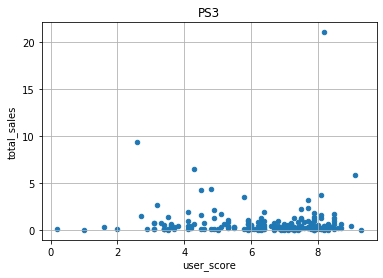

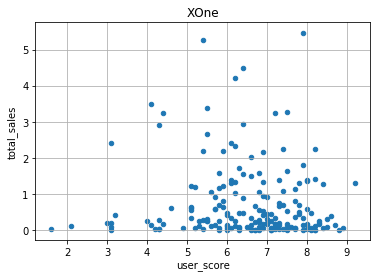

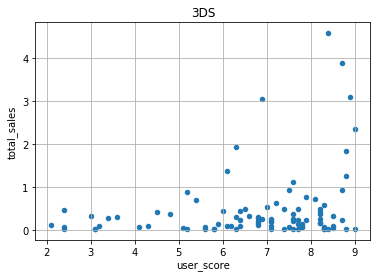

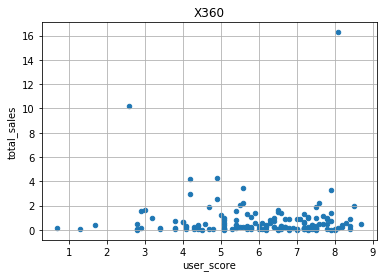

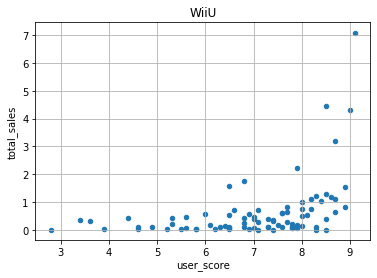

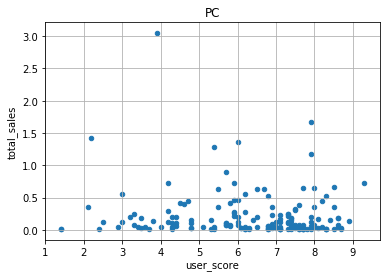

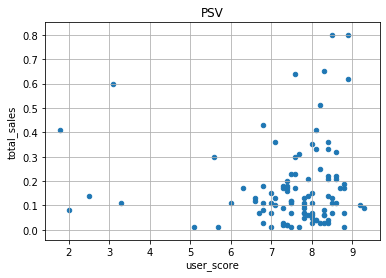

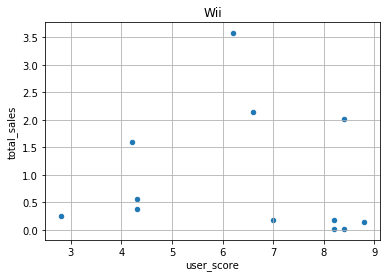

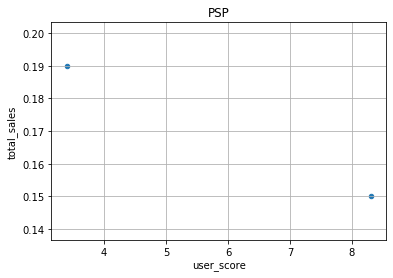

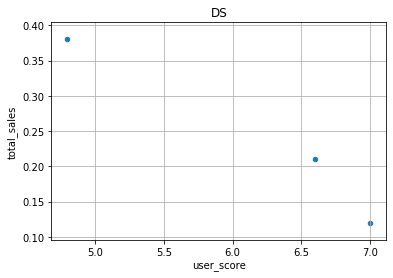

In [69]:
# Построим диаграммы рассеиния по отзывам пользователей для остальных платформ
top_platform = ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']
for name in top_platform:
    try:
        (df_good_years
         .query('platform == @name & user_score > 0').plot(x='user_score', y='total_sales', kind='scatter', grid=True));
        plt.title(name)
        plt.show();
    except: pass  

In [70]:
# Рассчитаем коэффициент корреляции по отзывам пользователей для остальных платформ:

top_platform = ['PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

for name in top_platform:
    games_good_years_corr = df_good_years.query('platform == @name & user_score > 0')
    platform_corr = games_good_years_corr['user_score'].corr(games_good_years_corr['total_sales'])
    try:
        print('Для платформы {}'.format(name), 'коэффициент корреляции равен {:.2f}'.format(platform_corr))
    except: pass

Для платформы PS3 коэффициент корреляции равен -0.01
Для платформы XOne коэффициент корреляции равен -0.07
Для платформы 3DS коэффициент корреляции равен 0.26
Для платформы X360 коэффициент корреляции равен -0.01
Для платформы WiiU коэффициент корреляции равен 0.42
Для платформы PC коэффициент корреляции равен -0.09
Для платформы PSV коэффициент корреляции равен 0.01
Для платформы Wii коэффициент корреляции равен -0.09
Для платформы PSP коэффициент корреляции равен -1.00
Для платформы DS коэффициент корреляции равен -0.98


**Вывод:** В целом, для большинства платформ коэффициент корреляции близок к нуля, что говорит об отсутствии зависимости продаж от оценок пользователей.

Для платформы WiiU - коэф. корреляции положительный и равен 0.42, что говорит о слабой связи между продажами и оценками пользователей.

Для платформ PSP и DS коэф. корреляции близок к (-1) - но для данных платформ слишком мало значений в наборе данных, чтобы считать коффициент корреляции значимым.

### 8. Посмотрим на общее распределение игр по жанрам. Что можем сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [71]:
# таблица с суммарными продажами по жанрам
games_genre = (df_good_years
               .pivot_table(index='genre', values='total_sales', aggfunc='sum')
               .sort_values(by = 'total_sales', ascending = False))
games_genre


,total_sales
genre,
Action,322.50
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,63.06
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


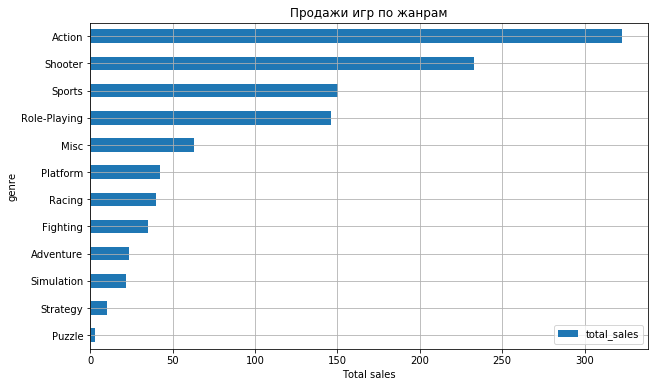

In [72]:
# График зависимости продаж от жанра
(df_good_years
     .pivot_table(index='genre', values='total_sales', aggfunc='sum')
     .sort_values(by= 'total_sales', ascending = True)
     .plot(kind='barh', grid=True, figsize=(10, 6))
);
plt.title('Продажи игр по жанрам')
plt.xlabel('Total sales');
plt.show();

In [73]:
games_genre_count = (df_good_years
                     .pivot_table(index='genre', values='total_sales', aggfunc='count')
                     .sort_values(by = 'total_sales', ascending = False))        
games_genre_count                     

,total_sales
genre,
Action,769
Role-Playing,292
Adventure,245
Sports,214
Shooter,187
Misc,156
Racing,85
Fighting,80
Platform,74


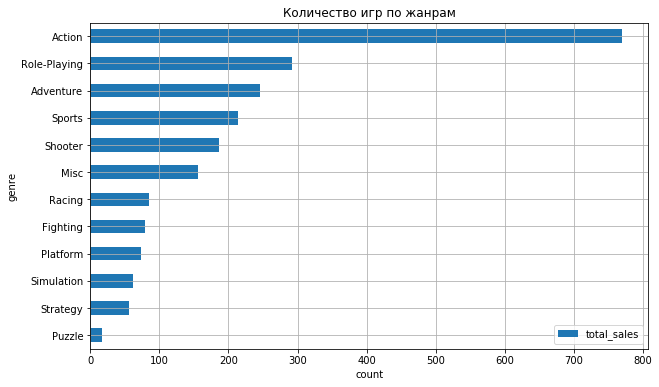

In [74]:
# График зависимости количества выпускаемых игр по жанрам
(df_good_years
     .pivot_table(index='genre', values='total_sales', aggfunc='count')
     .sort_values(by= 'total_sales', ascending = True)
     .plot(kind='barh', grid=True, figsize=(10, 6))
);
plt.title('Количество игр по жанрам')
plt.xlabel('сount');
plt.show();

**Вывод:** По продажам самый популярный жанр - Action (322.5 млн продаж). На втором месте по популярности жанр - Shooter (232.98 млн), на третьем - Sports (150.65 млн), на четвертом - Role-Playing (145.89 млн) и на пятом - Misc (63.06 млн продаж).
Наименее популярным жанром является - Puzzle (3.17 млн продаж).

По кол-ву выпускаемых игр самые популярные игры с жанром Action (769), что значительно больше всех остальных жанров. На втором месте игры жанра Role-Playing (292), а по кол-ву продаж на 4 месте. На третьем месте по количеству выпускаемых игр игры жанра Adventure (245), но при это игры жанра Adventure по количеству продаж только на 9 месте (из 12).

### Вывод_шаг4:

1.  Определили сколько игр выпускалось в разные годы. Построили гистограмму. Больше всего игр выпускалось в 2008 и 2009 годах. До 1995 года кол-во выпускаемых игр был очень низким, с 1995 по 2009 был рост в количестве выпускаемых игр, после 2009 г. выпуск игр пошел на спад и с 2012-2016 года количество выпускаемых игр примерно на одном уровне. Данные за все периоды не важны, до 1995 года данных очень мало и их можно не рассмартивать.

2. Определили как менялись продажи по платформам. Выбрали платформы с наибольшими суммарными продажами и построили распределение по годам. За примерно срок за 10 лет появляются новые и исчезают старые платформы.

3. Определили актуальный период. В качестве актуального периода для построения прогноза на 2017 год выберали период 2013-2016 гг.

4. Наиболее потенциально прибыльными платформами являются - PS4 и XOne. За 2013 - 2015 гг. у данных платформ был рост продаж, в 2016 году рост снизился, но выше, чем у остальных платформ. Также потенциально прибильной может быть платорма 3DS.

5. Построили диаграммы размаха для перспективных платформ: PS4, XOne и 3DS. Полученные диаграммы размаха иллюстрируют скошенность данных вправо (среднее больше медианы). Суммарные продажи больше всех у PS4 и более чем в 2 раза больше чем у XOne и 3DS, а суммарные продажи XOne и 3DS близки по значениям. Значение средних продаж больше всего у платформы PS4 и меньше всего у платформы 3DS (на 40% меньше, чем у PS4). 

6. Построили диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. В целом для всех рассматриваемых платформ, вероятна слабая взаимосвязь между оценками критиков и продажами, и отсутствует взаимосвязь между оценкой пользователей и продажами.

7. Определили продажи игр по жанрам. По продажам самый популярный жанр - Action (322.5 млн продаж). На втором месте по популярности жанр - Shooter (232.98 млн), на третьем - Sports (150.65 млн), на четвертом - Role-Playing (145.89 млн) и на пятом - Misc (63.06 млн продаж).Наименее популярным жанром является - Puzzle (3.17 млн продаж). По кол-ву выпускаемых игр самые популярные игры с жанром Action (769), что значительно больше всех остальных жанров. На втором месте игры жанра Role-Playing (292), а по кол-ву продаж на 4 месте. На третьем месте по количеству выпускаемых игр игры жанра Adventure (245), но при это игры жанра Adventure, по количеству продаж только на 9 месте (из 12).


## Шаг 4. Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишим различия в долях продаж.
* Самые популярные жанры (топ-5). Поясним разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [75]:
# Доли продаж в регионах по самым популярным платформам (топ-5):

def top_in_regions(column, regions_sales):
    pivot = df_good_years.groupby(column).agg({regions_sales: 'sum'}).sort_values(by=regions_sales, ascending=False).head(5)
    plot = pivot.plot(kind='pie', subplots=True, fontsize=15, autopct='%1.0f%%', use_index=False,
                    pctdistance=0.3, figsize=(20,5), colormap='Set3', legend=False )

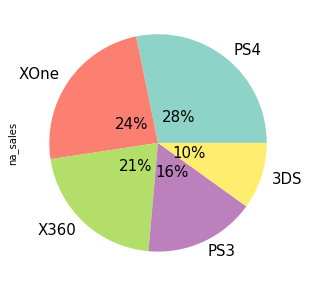

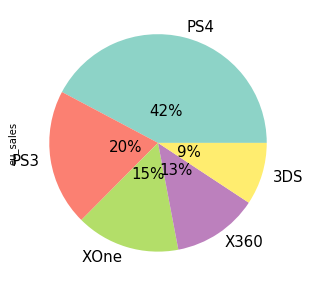

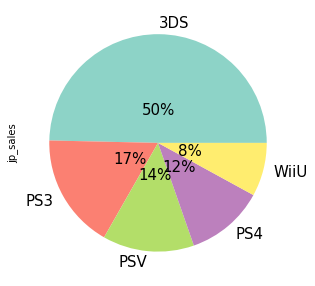

In [76]:
top_in_regions('platform', 'na_sales')
top_in_regions('platform', 'eu_sales')
top_in_regions('platform', 'jp_sales')


In [77]:
# Доли продаж в регионах по самым популярным жанрам (топ-5):

def top_in_regions(column, regions_sales):
    pivot = df_good_years.groupby(column).agg({regions_sales: 'sum'}).sort_values(by=regions_sales, ascending=False).head(5)
    plot = pivot.plot(kind='pie', subplots=True, fontsize=15, autopct='%1.0f%%', use_index=False,
                    pctdistance=0.3, figsize=(20,5), colormap='Set3', legend=False )

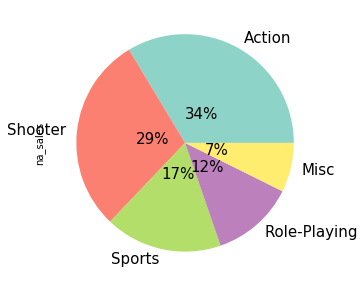

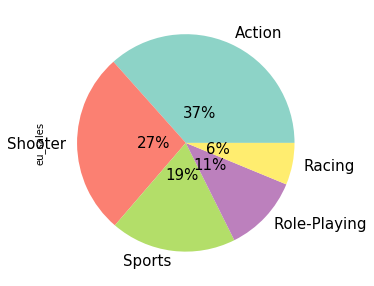

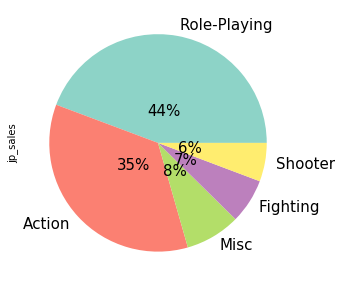

In [78]:
top_in_regions('genre', 'na_sales')
top_in_regions('genre', 'eu_sales')
top_in_regions('genre', 'jp_sales')

In [79]:
# Доли продаж в регионах по рейтингу ESRB:

def top_in_regions(column, regions_sales):
    query = df_good_years.query('rating != "NO"')
    pivot = query.groupby(column).agg({regions_sales: 'sum'}).sort_values(by=regions_sales, ascending=False).head(5)
    plot = pivot.plot(kind='pie', subplots=True, fontsize=15, autopct='%1.0f%%', use_index=False,
                    pctdistance=0.3, figsize=(20,5), colormap='Set3', legend=False )

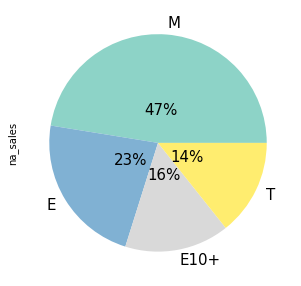

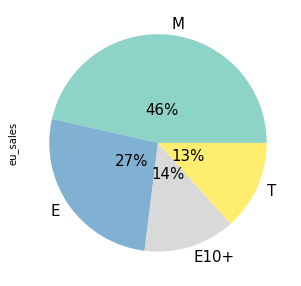

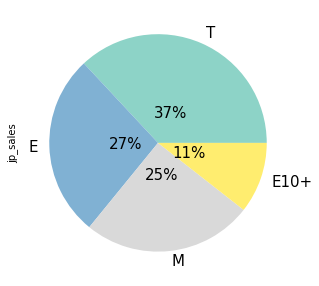

In [80]:
top_in_regions('rating', 'na_sales')
top_in_regions('rating', 'eu_sales')
top_in_regions('rating', 'jp_sales')

### Выводы_шаг 4:

1) Построили графики долей продаж в регионах по самым популярным платформам (топ-5).
Для Северной Америки и Европы набор самых популярных топ-5 платформ одинаковый (PS4, PS3, XOne, X360, 3DS). Самая популярная платформа - PS4. Наименее популярная - 3DS.
В топ 5 Японии топ 5 входят платформы: 3DS, PS3, PSV, PS4, XOne, WiiU. Для Японии самая популярная платформа отличается от Сев. Америки и Европы - 3DS, наименее популярная - WiiU.

2) Построили графики долей продаж в регионах по самым популярным жанрам (топ-5).
В Северной Америке и Европе самый популярный жанр - Action, на вторм месте - Shooter, на третьем - Sports, на четвертом - Role-Playing, на пятом в америке - Musc, а в Европе - Racing. Доли в топе распределены примерно одинаковов. 
В Японии в отличии от Сев. Америки и Европы самый популярный жанр - Role-Playing, наименее популярный - Scooter.

3) Рейтинги ESRB для Сев. Америки и Европы совпадают. Самый популярный рейтинг - M ("для взрослых"), наименне популярный Т ("Подросткам").
Рейтинги в Японии отличаются от Сев. Америки и Европы. Самый популярный рейтинг - Т ("Подросткам"), наименне популярный Е10+ ("Для всех от 10 лет и старше").
На втором месте по популярности во всех регионах - рейтинг E ("Для всех").

В целом портрет пользователей из Сев. Америки и Европы похож. Американцы и Европейцы схожи в своих предпочтениях по платформам и по жанрам игр.
Портрет пользователя из Японии значительно отличается от Сев. Америки и Европы. Это можно объяснить особенностями восточной культуры и ценностей.

## Шаг 5. Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind (array1, array2, equal_var).

Для проверки гипотез использую t-критерий потому, что выборки независимы между собой.

Расчитаем дисперсии для данных выборок в зависимости от того, равны они или нет передадим в параметр equal_var передадим значение True или False соответсвенно.

**Рассчитаем среднее, стандартное отклонение и дисперсию:**

In [81]:
platform_user_score = df_good_years.query('user_score > 0')

In [82]:
# Рассчитаем среднее, стандартное отклонение и дисперсию
stat_platform = (round(platform_user_score.groupby('platform')[['user_score']]
                       .agg(['mean', 'std', 'var'])))

stat_platform

user_score           
               mean  std   var
platform                      
3DS             7.0  2.0   3.0
DS              6.0  1.0   1.0
PC              6.0  2.0   3.0
PS3             6.0  2.0   3.0
PS4             7.0  1.0   2.0
PSP             6.0  3.0  12.0
PSV             7.0  1.0   2.0
Wii             6.0  2.0   4.0
WiiU            7.0  1.0   2.0
X360            6.0  2.0   3.0
XOne            7.0  1.0   2.0

**Проверка гипотезы 1:**

Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC равны"

Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC отличаются"

In [83]:
# Данные без выбросов сохраним в game_1 и game_2
platform_1 = df_good_years.query('platform == "XOne" & user_score >= 0')
platform_2 = df_good_years.query('platform == "PC" & user_score >= 0')

In [84]:
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

platform_XOne = platform_1['user_score']
platform_PC = platform_2['user_score']
    
results_tariff = st.ttest_ind(platform_XOne, platform_PC, equal_var = False)

results_tariff_pva = results_tariff.pvalue

print('p-значение: ', results_tariff_pva)
   
if results_tariff_pva < alpha:
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC отличаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC не отличаются")

p-значение:  0.25426709153788896
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC не отличаются


**Вывод:**  Результат проверки гипотезы: "Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC не отличаются".

Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ Xbox One и PC и неодинакова, с вероятностью в почти 26% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средним пользовательским рейтингом платформ Xbox One и PC.

**Гипотеза 2: "Средние пользовательские рейтинги жанров Action и Sports равны."**

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, примените метод scipy.stats.ttest_ind (array1, array2, equal_var).

Для проверки гипотез использую t-критерий потому, что выборки независимы между собой.

Расчитаем дисперсии для данных выборок в зависимости от того, равны они или нет в параметр equal_var передадим значение True или False соответсвенно.

**Рассчитаем среднее, стандартное отклонение и дисперсию:**

In [85]:
# Рассчитаем среднее, стандартное отклонение и дисперсию
stat_genre = (round(platform_user_score.groupby('genre')[['user_score']]
                       .agg(['mean', 'std', 'var'])))

stat_genre

user_score          
                   mean  std  var
genre                            
Action              7.0  1.0  2.0
Adventure           7.0  1.0  2.0
Fighting            7.0  1.0  2.0
Misc                7.0  1.0  1.0
Platform            7.0  2.0  3.0
Puzzle              7.0  1.0  1.0
Racing              6.0  2.0  3.0
Role-Playing        7.0  1.0  1.0
Shooter             6.0  2.0  2.0
Simulation          6.0  2.0  3.0
Sports              5.0  2.0  3.0
Strategy            6.0  2.0  4.0

**Проверка гипотезы 2:**

Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports равны"

Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports отличаются"

In [86]:
genre_1 = df_good_years.query('genre == "Action" & user_score > 0')
genre_2 = df_good_years.query('genre == "Sports" & user_score > 0')

In [87]:
alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

genre_action = genre_1['user_score']
genre_sports = genre_2['user_score']
    
results_tariff = st.ttest_ind(genre_action, genre_sports, equal_var=False)

results_tariff_pva = results_tariff.pvalue

print('p-значение: ', results_tariff_pva)
   
if results_tariff_pva < alpha:
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports отличаются")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports не отличаются")

p-значение:  6.545648554821845e-19
Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports отличаются


**Выводы:** 
Результат проверки гипотезы: "Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports отличаются". 

Можно сделать вывод, что средние пользовательские рейтинги жанров Action и Sports отличаются.

### Выводы_шаг 5:

1) Для проверки гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применили метод scipy.stats.ttest_ind (array1, array2, equal_var). Для проверки гипотез использую t-критерий т.к. выборки независимы между собой.

2) Расчитали дисперсии для данных выборок, дисперсии не равны между собой, поэтому в параметр equal_var передали значение False.

3) Сформулировали и проверили гипотезы: 

**Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

1) Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC равны"
2) Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC отличаются"

Результат проверки гипотез: "Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC не отличаются"

Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ Xbox One и PC и неодинакова, с вероятностью в почти 26% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средним пользовательским рейтингом платформ Xbox One и PC.

**Гипотеза 2: "Средние пользовательские рейтинги жанров Action и Sports равны."**

1) Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports равны"
2) Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports отличаются"

Результат проверки гипотезы: "Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports отличаются
"

Таким образом проверка гипотез показала, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются, а средние пользовательские рейтинги жанров Action и Sports отличаются.

## Шаг 6. Общий вывод

**В рамках Сборного проекта №1:**

1) Выполнена предобработка данных;
  
  2) Проведен исследовательский анализ данный;
  
  3) Составлен портрет пользователя каждого региона;
  
  4) Проверены гипотез.

**Получены следующие основные результаты и выводы:**
   
   1) Больше всего игр выпускалось в 2008 и 2009 годах. До 1995 года кол-во выпускаемых игр был очень низким, с 1995 по 2009 был рост в количестве выпускаемых игр, после 2009 г. выпуск игр пошел на спад и с 2012-2016 года количество выпускаемых игр примерно на одном уровне.Данные за все периоды не важны, до 1995 года данных очень мало и их можно не рассмартивать.
   
   2)  За 1995-2016 гг. топ продаж был по следующим платформам:GB, PS4, X360, PS3, Wii, N64, XOne, PS, PS2, WiiU.
   
   3) Определен актуальный период для прогнозирования продаж в 2017 году: **2013-2016 гг.**
   
   4) Наиболее потенциально прибыльными платформами являются - **PS4 и XOne**. За 2013 - 2015 гг. у данных платформ был рост продаж, в 2016 году рост снизился, но выше, чем у остальных платформ. Также потенциально прибильной является платорма **3DS**.
   
   5) Построили диаграммы размаха для перспективных платформ: PS4, XOne и 3DS. Полученные диаграммы размаха иллюстрируют скошенность данных вправо (среднее больше медианы). Суммарные продажи больше всех у PS4 и более чем в 2 раза больше чем у XOne и 3DS, а суммарные продажи XOne и 3DS близки по значениям. Значение средних продаж больше всего у платформы PS4 и меньше всего у платформы 3DS.
   
   6) В целом для всех рассматриваемых платформ, вероятна слабая взаимосвязь между оценками критиков и продажами, и отсутствует взаимосвязь между оценкой пользователей и продажами.
   
   7) Определили продажи игр по жанрам. По продажам самый популярный жанр - Action (322.5 млн продаж). На втором месте по популярности жанр - Shooter (232.98 млн), на третьем - Sports (150.65 млн), на четвертом - Role-Playing (145.89 млн) и на пятом - Misc (63.06 млн продаж).Наименее популярным жанром является - Puzzle (3.17 млн продаж). По кол-ву выпускаемых игр самые популярные игры с жанром Action (769), что значительно больше всех остальных жанров. На втором месте игры жанра Role-Playing (292), а по кол-ву продаж на 4 месте. На третьем месте по количеству выпускаемых игр игры жанра Adventure (245), но при это игры жанра Adventure, по количеству продаж только на 9 месте (из 12).
   
   8) Портрет пользователей из Сев. Америки и Европы похож. Американцы и Европейцы схожи в своих предпочтениях по платформам и по жанрам игр.  
     - Для Северной Америки и Европы набор самых популярных топ-5 платформ одинаковый (PS4, PS3, XOne, X360, 3DS). Самая популярная платформа - PS4. Наименее популярная - 3DS.    
     - В Северной Америке и Европе самый популярный жанр - Action, на вторм месте - Shooter, на третьем - Sports, на четвертом - Role-Playing, на пятом в америке - Musc, а в Европе - Racing. Доли в топе распределены примерно одинаковов. 
     
   9) Портрет пользователя из Японии значительно отличается от Сев. Америки и Европы. Это можно объяснить особенностями восточной культуры и ценностей.  В Японии топ 5 входят платформы: 3DS, PS3, PSV, PS4, XOne, WiiU. 
     - Для Японии самая популярная платформа отличается от Сев. Америки и Европы - 3DS, наименее популярная - WiiU. 
     - В Японии в отличии от Сев. Америки и Европы самый популярный жанр - Role-Playing, наименее популярный - Scooter.
     
   10) Рейтинги ESRB для Сев. Америки и Европы совпадают. Самый популярный рейтинг - M ("для взрослых"), наименне популярный Т ("Подросткам"). Рейтинги в Японии отличаются от Сев. Америки и Европы. Самый популярный рейтинг - Т ("Подросткам"), наименне популярный Е10+ ("Для всех от 10 лет и старше"). На втором месте по популярности во всех регионах - рейтинг E ("Для всех").  
         
   11)   Сформулировали и проверили гипотезы: 
        
**Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"**

    1) Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC равны"
    2) Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC отличаются"

Результат проверки гипотез: "Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC не отличаются"

**Гипотеза 2: "Средние пользовательские рейтинги жанров Action и Sports равны."**

    1) Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports равны"
    2) Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports отличаются"

Результат проверки гипотезы: "Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports отличаются
"

Таким образом, проверка гипотез показала, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются, а средние пользовательские рейтинги жанров Action и Sports отличаются.